In [2]:
%pip install emoji -q


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install wordcloud -q


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [27]:
import re
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import emoji
import itertools 
from collections import Counter
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [28]:
def date_time(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = regex.match(pattern, s)
    if result:
        return True
    return False

def find_author(s):
    s = s.split(":")
    if len(s)==2:
        return True
    else:
        return False

def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(", ")
    message = " ".join(splitline[1:])
    if find_author(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author= None
    return date, time, author, message

In [29]:
data = []
conversation = 'whatsapp.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if date_time(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

In [30]:
df = pd.DataFrame(data, columns=["Date", 'Time', 'Author', 'Message'])
df['Date'] = pd.to_datetime(df['Date'])
print(df.tail(20))
print(df.info())
print(df.Author.unique())

           Date      Time      Author  \
2008 2022-09-19  12:56 PM     vijay j   
2009 2022-09-19  12:59 PM        Afiz   
2010 2022-09-19  12:59 PM     Madhu I   
2011 2022-09-19   1:01 PM     vijay j   
2012 2022-10-10  12:08 PM     vijay j   
2013 2022-10-10   1:07 PM  dinesh jio   
2014 2022-10-10   1:37 PM        Afiz   
2015 2022-10-10   3:13 PM     vijay j   
2016 2022-10-10   3:14 PM     vijay j   
2017 2022-10-10   3:30 PM        Afiz   
2018 2022-10-10   3:30 PM        Afiz   
2019 2022-10-10   3:30 PM        Afiz   
2020 2022-10-10   3:35 PM     vijay j   
2021 2022-10-11  12:23 PM  dinesh jio   
2022 2022-10-11  12:23 PM  dinesh jio   
2023 2022-10-11  12:28 PM        Afiz   
2024 2022-10-13   7:11 PM  dinesh jio   
2025 2022-10-13   7:12 PM     vijay j   
2026 2022-10-14   8:42 AM   RajaMohan   
2027 2022-10-14   8:42 AM  dinesh jio   

                                                Message  
2008                                    <Media omitted>  
2009                  

In [32]:
df['day'] = df['Date'].dt.strftime('%a')
df['month'] = df['Date'].dt.strftime('%b')
df['year'] = df['Date'].dt.year
df['date'] = df['Date'].apply(lambda x: x.date())

In [34]:
df1 = df.copy()      # I will be using a copy of the original data frame everytime, to avoid loss of data!
df1['message_count'] = [1] * df1.shape[0]      # adding extra helper column --> message_count.
df1.drop(columns='year', inplace=True)         # dropping unnecessary columns, using `inplace=True`, since this is copy of the DF and won't affect the original DataFrame.
df1 = df1.groupby('date').sum().reset_index()  # grouping by date; since plot is of frequency of messages --> no. of messages / day.
df1

,date,message_count
0,2021-12-24,58
1,2021-12-25,123
2,2021-12-26,15
3,2021-12-31,1
4,2022-02-23,90
...,...,...
72,2022-09-19,30
73,2022-10-10,9
74,2022-10-11,3
75,2022-10-13,2


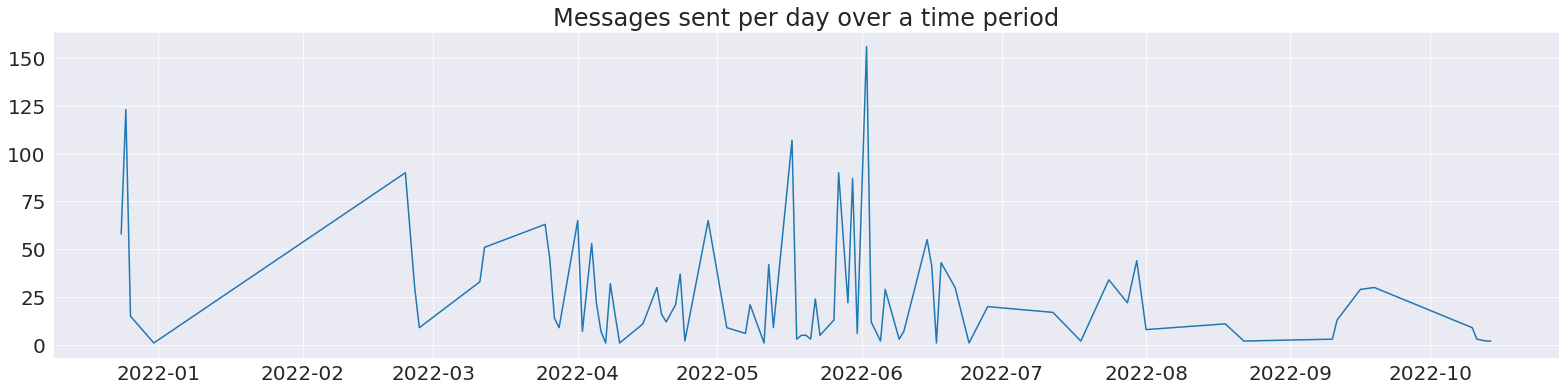

In [35]:
sns.set_style("darkgrid")

# For better readablity;
import matplotlib
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (27, 6)      # Same as `plt.figure(figsize = (27, 6))`


# A basic plot
plt.plot(df1.date, df1.message_count)
plt.title('Messages sent per day over a time period');

# Could have used Seaborn's lineplot as well.
# sns.lineplot(df1.date, df1.message_count);   


# Saving the plots
plt.savefig('msg_plots.svg', format = 'svg')

In [36]:
top10days = df1.sort_values(by="message_count", ascending=False).head(10)    # Sort values according to the number of messages per day.
top10days.reset_index(inplace=True)           # reset index in order.
top10days.drop(columns="index", inplace=True) # dropping original indices.
top10days

,date,message_count
0,2022-06-02,156
1,2021-12-25,123
2,2022-05-17,107
3,2022-05-27,90
4,2022-02-23,90
5,2022-05-30,87
6,2022-04-29,65
7,2022-04-01,65
8,2022-03-25,63
9,2021-12-24,58


## WhatsApp Data Analysis using Python

### Most Active Days

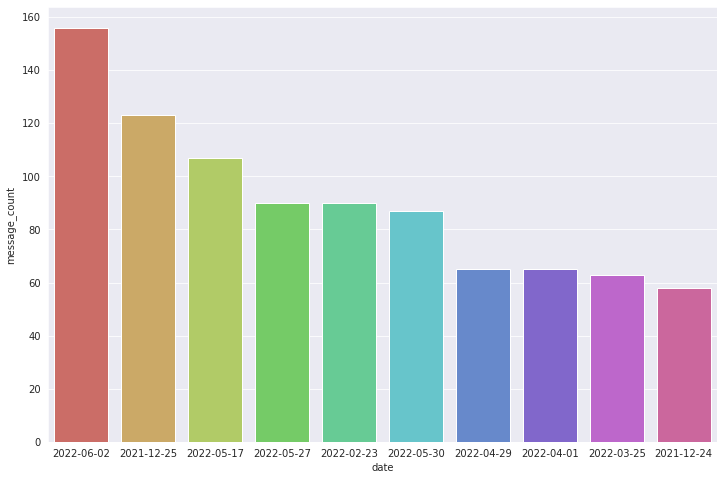

In [37]:
sns.set_style("darkgrid")

# For better readablity;
import matplotlib
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (12, 8)

# A bar plot for top 10 days
sns.barplot(top10days.date, top10days.message_count, palette="hls");

# Saving the plots
plt.savefig('top10_days.svg', format = 'svg')

### Word Cloud of mostly used word in our Group

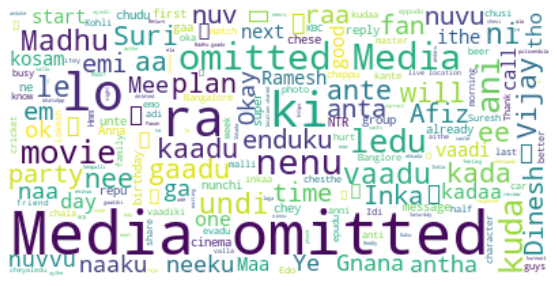

In [22]:
### Word Cloud of mostly used word in our Group
text = " ".join(review for review in df.Message)
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)
  ### Display the generated image:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [23]:
### Creates a list of unique Authors
l = df.Author.unique()
for i in range(len(l)):
  ### Filtering out messages of particular user
  req_df = df[df["Author"] == l[i]]
  ### req_df will contain messages of only one particular user
  print(l[i],'  ->  ',req_df.shape[0])

None   ->   0
dinesh jio   ->   305
Afiz   ->   551
BF Puli   ->   48
vijay j   ->   291
Madhu I   ->   575
suresh   ->   129
ramesh b   ->   76
RajaMohan   ->   8


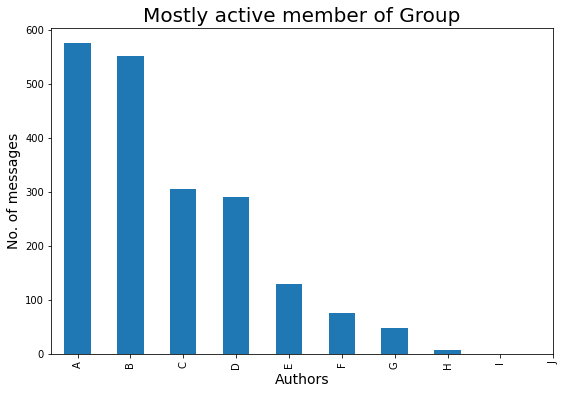

In [24]:
## Mostly Active Author in the Group
plt.figure(figsize=(9,6))
mostly_active = df['Author'].value_counts()
### Top 10 peoples that are mostly active in our Group is : 
m_a = mostly_active.head(10)
bars = ['A','B','C','D','E','F','G','H','I','J']
x_pos = np.arange(len(bars))
m_a.plot.bar()
plt.xlabel('Authors',fontdict={'fontsize': 14,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Mostly active member of Group',fontdict={'fontsize': 20,'fontweight': 8})
plt.xticks(x_pos, bars)
plt.show()

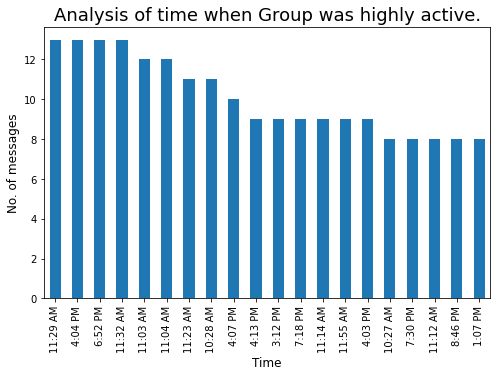

In [26]:
### Time whenever our group is highly active
plt.figure(figsize=(8,5))
t = df['Time'].value_counts().head(20)
tx = t.plot.bar()

plt.xlabel('Time',fontdict={'fontsize': 12,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 12,'fontweight': 10})
plt.title('Analysis of time when Group was highly active.',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()